In [1]:
import numpy as np
import pandas as pd
import requests 
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup

# The Problem i had
I took my dateframe from Kaggle, but in it's page the data frame is not demonstrated as a table. They use the link to csv file, which is opened on their website. So i can't get data from get reques. To solve this problem i have downloaded .csv file, then conver it to HTML and made my own website with this table. Then i uploaded it to web, and now i'm getting the dataframe from my website using flask.

link to my website: https://makarenkovartem.w3spaces.com/

link to kagle data: https://www.kaggle.com/nehalbirla/vehicle-dataset-from-cardekho


In [2]:
url = 'https://makarenkovartem.w3spaces.com/'
response = requests.get (url)
soup=BeautifulSoup(response.text, 'lxml') 
table = soup.find("table")
heading_table = []
for row in table.find_all('th'): 
    heading_table.append(row.text.strip())
content = [] 
for row in table.find_all('tr'): 
    if not row.find_all('th'): 
        content.append([element.text for element in row.find_all('td')])
df = pd.DataFrame(content, columns=heading_table) 

Here, using get request, i got html text from website, and then convert it to pandas

In [3]:
df

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner
...,...,...,...,...,...,...,...,...
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,409999,80000,Diesel,Individual,Manual,Second Owner
4336,Hyundai i20 Magna 1.4 CRDi,2014,409999,80000,Diesel,Individual,Manual,Second Owner
4337,Maruti 800 AC BSIII,2009,110000,83000,Petrol,Individual,Manual,Second Owner
4338,Hyundai Creta 1.6 CRDi SX Option,2016,865000,90000,Diesel,Individual,Manual,First Owner


In [4]:
df['year'] = df['year'].astype(float)
df['selling_price'] = df['selling_price'].astype(float)
df['km_driven'] = df['km_driven'].astype(float)

I converted the colums with numeric values from string to float type

In [5]:
des = df.describe()
drop_list = ['25%', "max", "75%", "min", "count"]
for i in drop_list:
    des = des.drop(i)
des = des.reindex( ["mean",  "50%","std"])
des.index = ["mean", "median", "standard deviation"]
des

,year,selling_price,km_driven
mean,2013.090783,504127.311751,66215.777419
median,2014.000000,350000.000000,60000.000000
standard deviation,4.215344,578548.736139,46644.102194


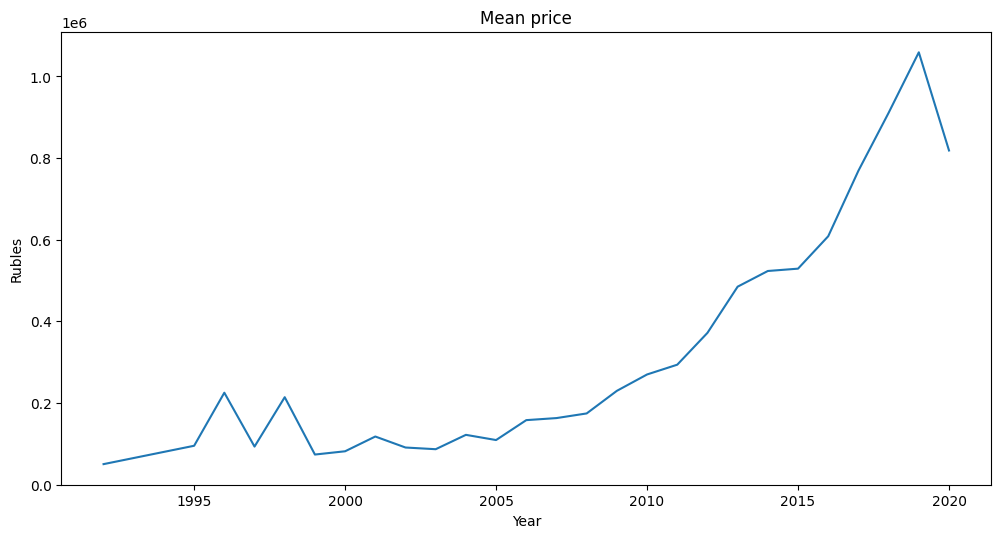

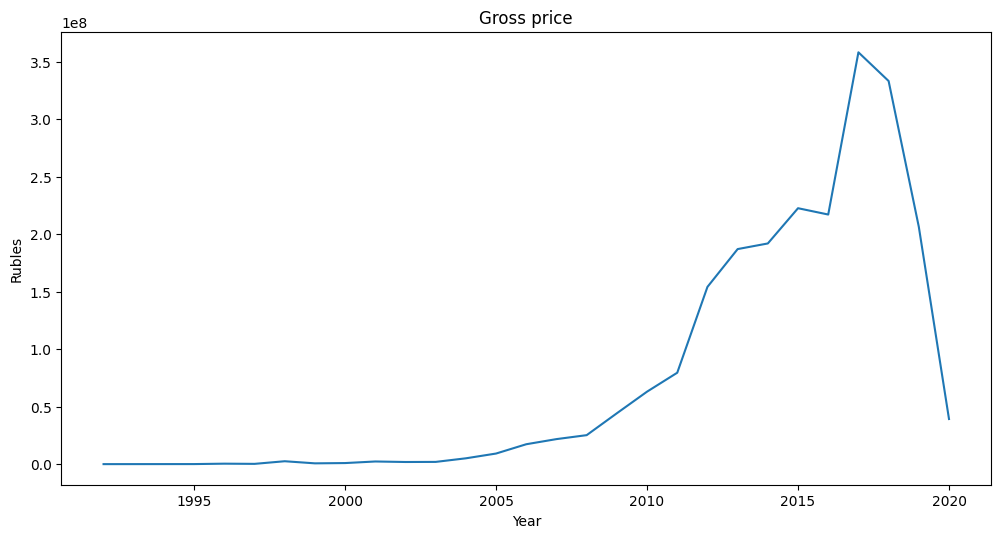

In [6]:
plt.figure(num=None, figsize=(12, 6), dpi= 100, facecolor='w', edgecolor='k')
plt.plot(df.groupby('year')['selling_price'].mean())
plt.title('Mean price') 
plt.xlabel('Year') 
plt.ylabel('Rubles') 
  
plt.show() 

plt.figure(num=None, figsize=(12, 6), dpi= 100, facecolor='w', edgecolor='k')
plt.plot(df.groupby('year')['selling_price'].sum())
plt.title('Gross price') 
plt.xlabel('Year') 
plt.ylabel('Rubles') 
  
plt.show()

Text(0.5, 1.0, 'Price on market')

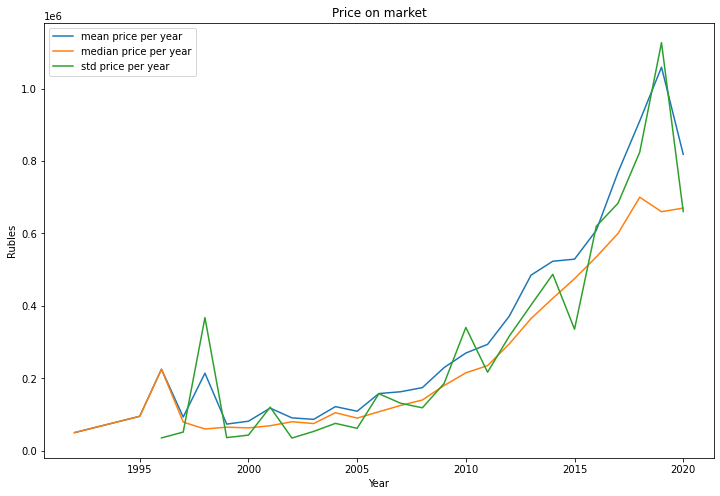

In [7]:
fig, ax = plt.subplots(figsize=(12,8))

ax.plot(df.groupby('year')['selling_price'].mean(), label="mean price per year")
ax.plot(df.groupby('year')['selling_price'].median(), label="median price per year")
ax.plot(df.groupby('year')['selling_price'].std(), label="std price per year")

ax.legend(loc=2)
ax.set_xlabel('Year')
ax.set_ylabel('Rubles')
ax.set_title('Price on market')

<BarContainer object of 5 artists>

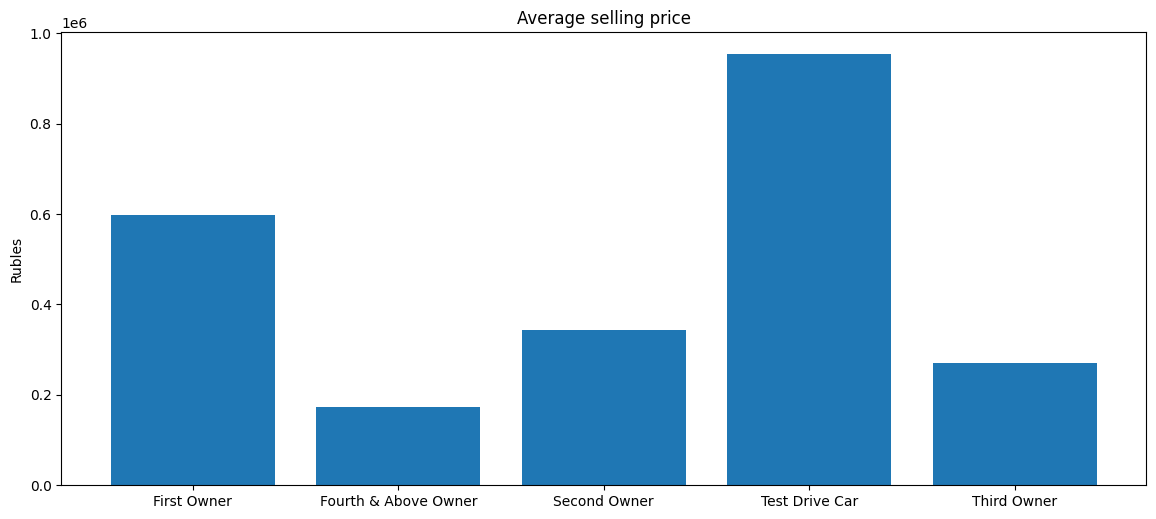

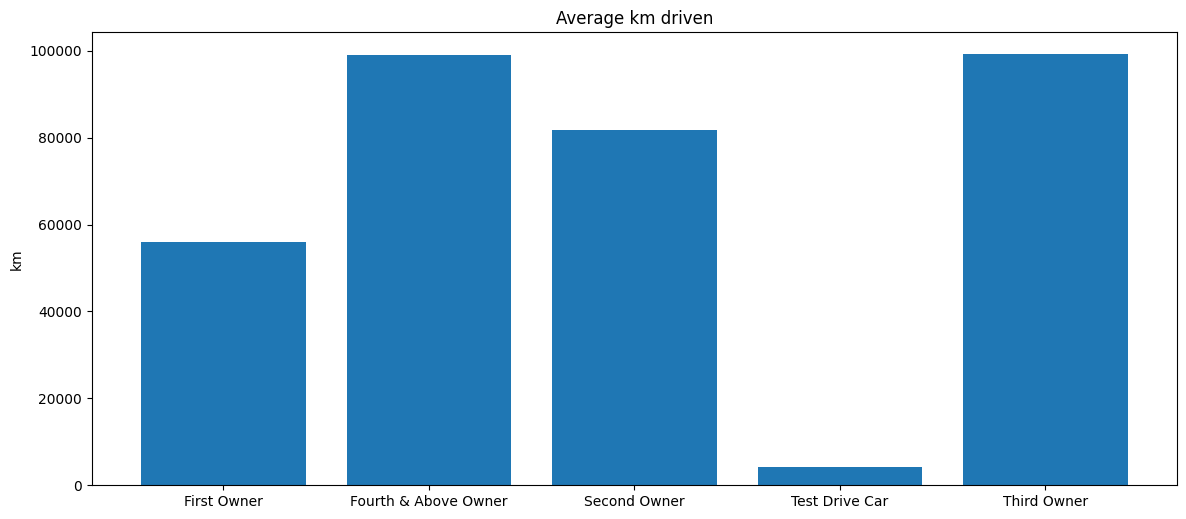

In [8]:
plt.figure(num=None, figsize=(14, 6), dpi= 100, facecolor='w', edgecolor='k')
owner_list = list(df.groupby('owner')['selling_price'].mean().index)
price_list = df.groupby('owner')['selling_price'].mean()
plt.title('Average selling price') 
plt.ylabel('Rubles') 
plt.bar (owner_list, price_list)

plt.figure(num=None, figsize=(14, 6), dpi= 100, facecolor='w', edgecolor='k')
owner_list = list(df.groupby('owner')['km_driven'].mean().index)
price_list = df.groupby('owner')['km_driven'].mean()
plt.title('Average km driven') 
plt.ylabel('km') 
plt.bar (owner_list, price_list)

#Analysis:
1. The newest car are more expensive, comparing to those which were created earlier.
2. The cars which were built around 25 years ago sometimes cost much more than newer vehicles.
3. Median price shows more accurate data about the average price of cars in India.
4. The "test drive" cars are much expensive. This is possible that it is because they have not been driven yet.
5. "fourth & above owner" cars have driven a teamendous number of km, and that is why they are much cheaper.
6. "second driver" & "third owner" cars show really similar statistics of price & average km driven.